In [73]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
#dataset do Kaggle de análise de estrelas (o mesmo utilizado no problema de classificação)
#https://www.kaggle.com/deepu1109/star-dataset
dataset = "https://raw.githubusercontent.com/Leovsimoes/ReconhecimentoDePadroes/main/6%20class%20csv.csv"
df = pd.read_csv(dataset)

#avaliando a discrepancia entre as características
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Para este exercício, será aplicado o LogisticRegression como solicitado no enunciado, e serão avaliadas diversas alterações em cima do modelo muitas das funções utilizadas pertencem a classe model_selection do scikit-learn.
<hr style="height:2px;border-width:0;color:black;background-color:black">
A primeira validação será apenas separado o conjunto de treino e teste, sem o cross-validate, sem normalização e sem pipeline, colocando o conjunto de teste em 20%, e o random_state como do exemplo do scikit_learn para manter a rastreabilidade da separação.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Star type','Spectral Class','Star color'],axis=1), df['Star type'], test_size=0.2, random_state=42)

#alterando o parâmetro de iterações para manter a convergência do modelo
modelo = LogisticRegression(max_iter=10000)
modelo.fit(X_train,y_train)

print(modelo.score(X_test,y_test))

0.9583333333333334


O score da primeira validação deu um resultado relativamente alto (quase 96% de assertividade). Nas próximas avaliações vamos ver como o modelo irá se comportar.
<hr style="height:2px;border-width:0;color:black;background-color:black">
A segunda validação será aplicando o modelo com o cross_validate sem normalizar os dados.

In [7]:
X = df.drop(['Star type','Spectral Class','Star color'],axis=1)
y = df['Star type']

#alterando o parâmetro de iterações para manter a convergência do modelo
modelo = LogisticRegression(max_iter=10000)

#por hora, como estou interessado somente nos scores, vou utilizar cross_val_score ao invés de cross_validate
scores = cross_val_score(modelo, X, y, cv=5)
print("Scores:",scores)
print("Média dos scores:",scores.mean())

Scores: [0.97916667 0.97916667 0.95833333 1.         0.89583333]
Média dos scores: 0.9625


A média de scores dessa segunda validação também gerou um valor aproximado de 96%
<hr style="height:2px;border-width:0;color:black;background-color:black">
Conforme feito na aula, vamos avaliar melhor as características dos dados, como feito nos vídeos da aula, mas aqui utilizando um boxplot.

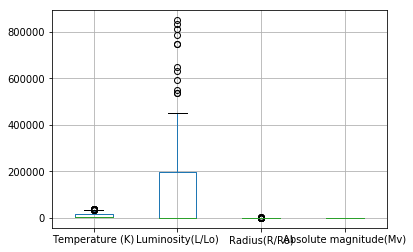

In [4]:
df.drop(['Star type','Spectral Class','Star color'],axis=1).boxplot()

<BarContainer object of 4 artists>

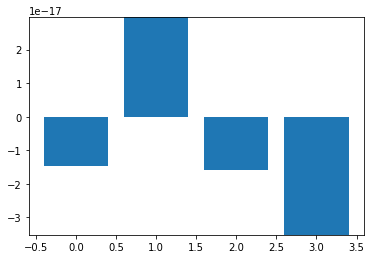

In [8]:
X = StandardScaler().fit_transform(df.drop(['Star type','Spectral Class','Star color'],axis=1))
y = df['Star type']

#como o StandardScaler retorna um array, vou utilizar a mesma função de avaliação do professor no vídeo para avaliar a magnitude dos valores em comparação com o boxplot
plt.bar(list(range(X.shape[1])), np.mean(X,axis=0))

Aplicando a padronização via StandardScaler como no vídeo, é visível a redução da diferença entre as características
<hr style="height:2px;border-width:0;color:black;background-color:black">
A terceira validação será aplicando apenas o cross_val_score para 5 folds da base totalmente normalizada, que já retornou um valor um pouco mais baixo e talvez condizente com a realidade

In [9]:
#Importante reparar que com a normalização não foi necessário alterar o parâmetro de iterações
modelo = LogisticRegression()
scores = cross_val_score(modelo, X, y, cv=5)
print("Scores:",scores)
print("Média dos scores:",scores.mean())

Scores: [1.         0.8125     0.95833333 0.97916667 0.875     ]
Média dos scores: 0.925


Com a normalização a média dos scores do modelo com o cross-validate caiu 4%, o que já é uma diferença significativa
<hr style="height:2px;border-width:0;color:black;background-color:black">
Para a quarta validação serão separados os conjuntos de treino e teste, mas vou normalizar o conjunto de treino aplicando o modelo nesse conjunto e depois avaliando o conjunto de teste também normalizado.

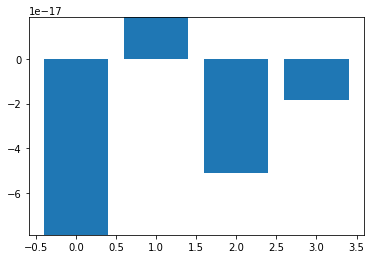

In [10]:
#segui os mesmos parâmetros da primeira validação
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Star type','Spectral Class','Star color'],axis=1), df['Star type'], test_size=0.2, random_state=42)

#Aplicando a normalização no treino
X_train = StandardScaler().fit_transform(X_train)
plt.bar(list(range(X_train.shape[1])), np.mean(X_train,axis=0))
plt.show()

Aqui é visível que a diferença diminui bastante positivamente, mas aumenta nos valores negativos

In [11]:
modelo = LogisticRegression()
modelo.fit(X_train,y_train)

#normalizando o teste
X_test = StandardScaler().fit_transform(X_test)

print(modelo.score(X_test,y_test))

0.8958333333333334


O valor gerado foi ainda menor do que o cross-validate
<hr style="height:2px;border-width:0;color:black;background-color:black">
Como quinta validação será aplicado um pipeline da padronização mais a Regressão Logística.
<br/>E também será padronizada a base e aplicado somente um pipeline com a Regressão para avaliar o comportamento

In [47]:
modelo = Pipeline([("padronizacao",StandardScaler()),("classificador",LogisticRegression())])

scores = cross_val_score(modelo, df.drop(['Star type','Spectral Class','Star color'],axis=1), df['Star type'], cv=5)

print("Scores (Padronização e Estimator no Pipeline):",scores)
print("Média dos scores (Padronização e Estimator no Pipeline):",scores.mean())

#----------------------------------------------------------------------------------

X = StandardScaler().fit_transform(df.drop(['Star type','Spectral Class','Star color'],axis=1))
y = df['Star type']

modelo = Pipeline([("classificador",LogisticRegression())])

scores = cross_val_score(modelo, X, y, cv=5)

print("Scores (Base padronizada e somente Estimator no Pipeline):",scores)
print("Média dos scores (Base padronizada e somente Estimator no Pipeline):",scores.mean())

Scores (Padronização e Estimator no Pipeline): [1.         0.8125     0.95833333 0.97916667 0.875     ]
Média dos scores (Padronização e Estimator no Pipeline): 0.925
Scores (Base padronizada e somente Estimator no Pipeline): [1.         0.8125     0.95833333 0.97916667 0.875     ]
Média dos scores (Base padronizada e somente Estimator no Pipeline): 0.925


Os resultados foram exatamente os mesmos, que ainda casou com o resultado da terceira validação onde toda a base foi padronizada, e foi executado o cross_val_score... Para mim está bem esquisito, pois faz sentido o resultado do pipeline somente com o estimator bater com a segunda validação, mas o pipeline com a padronização e estimator deveria ser diferente.
<br/>Vou aprofundar um pouco para entender a avaliação que é feita nos modelos. Para isso vou pegar parte do código fonte da função cross_validate do Sklearn

In [72]:
#essa parte do código retirei de https://github.com/scikit-learn/scikit-learn/blob/0d378913b/sklearn/model_selection/_validation.py#L48 para manter a integridade do split
from sklearn.model_selection._split import check_cv
from sklearn.base import is_classifier, clone
cv = check_cv(5, df['Star type'], classifier=is_classifier(modelo))

#a partir daqui já comecei escrever o código para validar os valores.
#primeiro vou padronizar toda a base e aplicar a regressão logística para cada intervalo
#segundo vou fazer a padronização (StandardScaler) e depois a regressão logística para cada pedaço (esse passo não foi feito anteriormente pois o cross_val_score não permite quebrar como abaixo)
#depois vou executar a padronização para toda a base o pipeline para cada intervalo
#por ultimo o pipeline com a padronização e regressão


#----------------------------------------------------------------------------------
#primeira parte

X = StandardScaler().fit_transform(df.drop(['Star type','Spectral Class','Star color'],axis=1))
y = df['Star type']
mean = 0
for train, test in cv.split(X,y):
    modelo = LogisticRegression()
    modelo.fit(X[train],y[train])
    mean += modelo.score(X[test],y[test])
    
print("Primeira média:",mean/5)



#----------------------------------------------------------------------------------
#segunda parte

X = df.drop(['Star type','Spectral Class','Star color'],axis=1)
y = df['Star type']
mean = 0
for train, test in cv.split(X,y):
    X_train = StandardScaler().fit_transform(X.loc[train])
    X_test = StandardScaler().fit_transform(X.loc[test])
    modelo = LogisticRegression()
    modelo.fit(X_train,y[train])
    mean += modelo.score(X_test,y[test])
    
print("Segunda média:",mean/5)


#----------------------------------------------------------------------------------
#terceira parte

X = StandardScaler().fit_transform(df.drop(['Star type','Spectral Class','Star color'],axis=1))
y = df['Star type']
mean = 0
modelo = Pipeline([("classificador",LogisticRegression())])
for train, test in cv.split(X,y):
    modelo.fit(X[train],y[train])
    mean += modelo.score(X[test],y[test])
    
print("Terceira média:",mean/5)


#----------------------------------------------------------------------------------
#quarta parte

X = df.drop(['Star type','Spectral Class','Star color'],axis=1)
y = df['Star type']
mean = 0
modelo = Pipeline([("padronizacao",StandardScaler()),("classificador",LogisticRegression())])
for train, test in cv.split(X,y):
    modelo.fit(X.loc[train],y[train])
    mean += modelo.score(X.loc[test],y[test])
    
print("Quarta média:",mean/5)

Primeira média: 0.925
Segunda média: 0.9458333333333334
Terceira média: 0.925
Quarta média: 0.925


Realmente, neste dataset não faz diferença padronizar todo o conjunto antes ou durante o pipeline, pois o resultado é o mesmo. Mais a frente vou avaliar esse teste para outro dataset
<hr style="height:2px;border-width:0;color:black;background-color:black">
Como última validação utilizarei o GridSearchCV para pesquisa dos hiperparâmetros. Nessa primeira avaliação apenas a chamada da função sem pipeline, padronização ou cross-validate.

In [77]:
X = df.drop(['Star type','Spectral Class','Star color'],axis=1)
y = df['Star type']

#vou selecionar o parametro solver, pois todas as opções podem rodar com o penalty l2
parametros = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "fit_intercept": [True,False], "C": [1.0,2.0,3.0,3.5]}
gridsearch = GridSearchCV(LogisticRegression(max_iter=10000),parametros)

gridsearch.fit(X,y)

D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\amdskit\d

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: Li

D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: Li

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 2.0, 3.0, 3.5],
                         'fit_intercept': [True, False],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [88]:
print("Melhor score:",gridsearch.best_score_)
print("Melhores parâmetros",gridsearch.best_params_)

Melhor score: 0.9708333333333332
Melhores parâmetros {'C': 1.0, 'fit_intercept': True, 'solver': 'newton-cg'}


Trouxe um resultado alto. Vou inserir a padronização, e o gridsearch dentro do pipeline, chamado por um cross-validate para validação

In [93]:
X = df.drop(['Star type','Spectral Class','Star color'],axis=1)
y = df['Star type']

#vou selecionar o parametro solver, pois todas as opções podem rodar com o penalty l2
parametros = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "fit_intercept": [True,False], "C": [1.0,2.0,3.0,3.5]}
gridsearch = GridSearchCV(LogisticRegression(max_iter=10000),parametros)
modelo = Pipeline([("padronizacao",StandardScaler()),("gridsearch",gridsearch)])
scores = cross_validate(modelo, X, y, cv=5)

print("Média dos scores:",scores['test_score'].mean())

Média dos scores: 0.9416666666666667


Essa abordagem já abaixou um pouco o valor dos scores. Como ultima validação, seguindo o mesmo raciocinio do vídeo, vou fazer o pipeline dentro do gridsearch

In [95]:
pipeline = Pipeline([("padronizacao",StandardScaler()),("classificacao",LogisticRegression(max_iter=10000))])
parametros = {"classificacao__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "classificacao__fit_intercept": [True,False], "classificacao__C": [1.0,2.0,3.0,3.5]}
modelo = GridSearchCV(pipeline,parametros)
scores = cross_validate(modelo, X, y, cv=5)

print("Média dos scores:",scores['test_score'].mean())

Média dos scores: 0.9416666666666667


Mesmo resultado que o anterior, o que comprova o que foi dito no vídeo, que não foi necessário fazer um ajuste no pré-processamento
<hr style="height:2px;border-width:0;color:black;background-color:black">
Como desencargo de consciência, pesquisei um novo dataset multiclasse para avaliar os pontos críticos deste exercício

In [100]:
#Dataset de avaliação qualitativa de vinho, baseado em testes
#https://www.kaggle.com/shelvigarg/wine-quality-dataset
dataset = "https://raw.githubusercontent.com/Leovsimoes/ReconhecimentoDePadroes/main/winequalityN.csv"
df = pd.read_csv(dataset)

In [103]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [106]:
df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [113]:
df.shape

(6497, 13)

D:\amdskit\dev\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


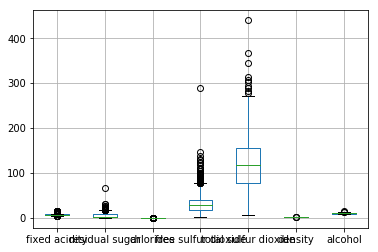

In [109]:
df[['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']].boxplot()

Testando o pipeline com a padronização dentro e fora

In [120]:
modelo = Pipeline([("padronizacao",StandardScaler()),("classificador",LogisticRegression())])

scores = cross_val_score(modelo, df.dropna()[['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']], df.dropna()['quality'], cv=5)

print("Scores (Padronização e Estimator no Pipeline):",scores)
print("Média dos scores (Padronização e Estimator no Pipeline):",scores.mean())

#----------------------------------------------------------------------------------

X = StandardScaler().fit_transform(df.dropna()[['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']])
y = df.dropna()['quality']

modelo = Pipeline([("classificador",LogisticRegression())])

scores = cross_val_score(modelo, X, y, cv=5)

print("Scores (Base padronizada e somente Estimator no Pipeline):",scores)
print("Média dos scores (Base padronizada e somente Estimator no Pipeline):",scores.mean())

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Scores (Padronização e Estimator no Pipeline): [0.45320959 0.49574633 0.51508121 0.55185759 0.45975232]
Média dos scores (Padronização e Estimator no Pipeline): 0.4951294060181161


D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Scores (Base padronizada e somente Estimator no Pipeline): [0.45320959 0.49574633 0.51430781 0.55185759 0.45897833]
Média dos scores (Base padronizada e somente Estimator no Pipeline): 0.4948199282155163


D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Apesar dos warnings que foram gerados de convergência de valores, fiz o teste para parâmetro max_iter = 5.000 e o score continuou na casa dos 49%. Dessa forma removi o parâmetro max_iter, para validar que existe diferença da padronização dentro e fora do pipeline.
<br/>Neste caso, com a padronização dentro do pipeline, gerou um score médio de 49,51%, e a padronização fora do pipeline gerou um score de 49,48%
<br/><br/>Por último vou fazer o teste com o gridsearch dentro do pipeline, e do pipeline dentro do gridsearch para avaliar os resultados

In [122]:
X = df.dropna()[['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']]
y = df.dropna()['quality']

#vou selecionar o parametro solver, pois todas as opções podem rodar com o penalty l2
parametros = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "fit_intercept": [True,False], "C": [1.0,2.0,3.0,3.5]}
gridsearch = GridSearchCV(LogisticRegression(),parametros)
modelo = Pipeline([("padronizacao",StandardScaler()),("gridsearch",gridsearch)])
scores = cross_validate(modelo, X, y, cv=5)

print("Média dos scores:",scores['test_score'].mean())

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the da

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Média dos scores: 0.4841419264005517


In [123]:
pipeline = Pipeline([("padronizacao",StandardScaler()),("classificacao",LogisticRegression())])
parametros = {"classificacao__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "classificacao__fit_intercept": [True,False], "classificacao__C": [1.0,2.0,3.0,3.5]}
modelo = GridSearchCV(pipeline,parametros)
scores = cross_validate(modelo, X, y, cv=5)

print("Média dos scores:",scores['test_score'].mean())

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the da

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\amdskit\dev\anaconda3\lib\site-packages\

D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Média dos scores: 0.4841419264005517


Para o estudo do gridsearch x pipeline o resultado permaneceu o mesmo, dado que não foi feita nenhuma alteração no pré-processamento da base